In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sounddevice as sd

In [2]:
import soundfile as sf

def read_audio_section(filename, start_time, stop_time):
    track = sf.SoundFile(filename)

    can_seek = track.seekable() # True
    if not can_seek:
        raise ValueError("Not compatible with seeking")

    sr = track.samplerate
    start_frame = sr * start_time
    frames_to_read = sr * (stop_time - start_time)
    track.seek(start_frame)
    audio_section = track.read(frames_to_read)
    return audio_section, sr

def extract_as_clip(input_filename, start_time, stop_time):
    audio_extract, sr = read_audio_section(input_filename, start_time, stop_time)
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(audio_extract, sr=sr)
    sd.play(audio_extract, sr,blocking=True)

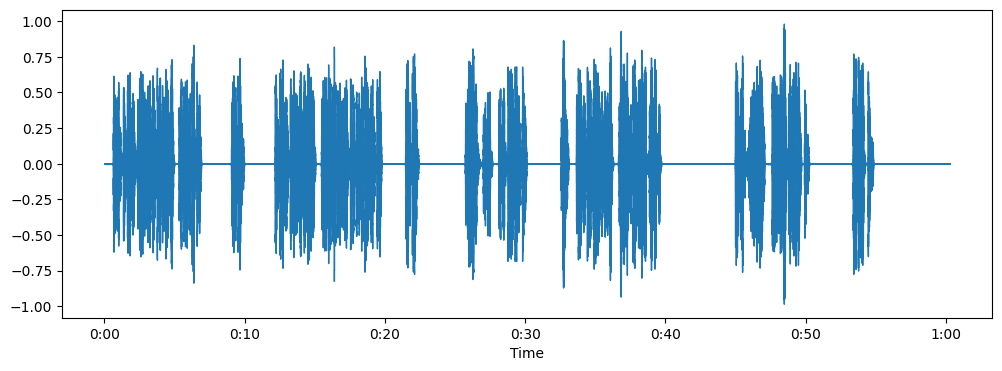

In [4]:
y, sr = librosa.load('./test_aaico_challenge.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)

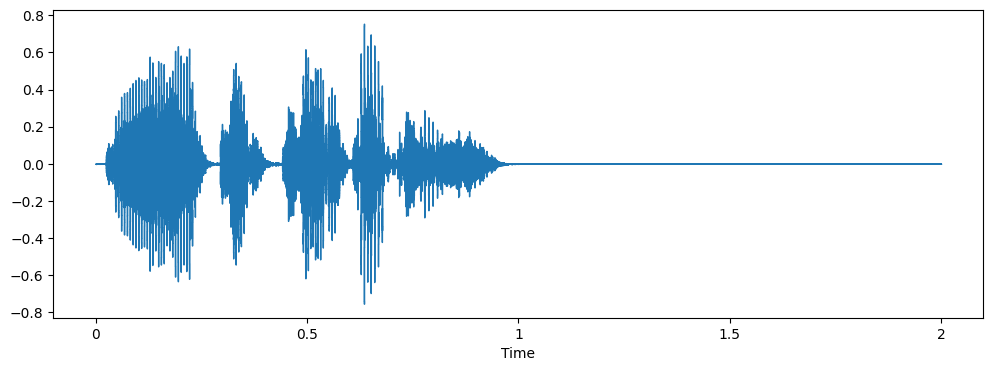

In [6]:
extract_as_clip('./test_aaico_challenge.wav',9, 11)


In [7]:
y.shape

(1329207,)

In [8]:
num_frames = len(y)/512
num_frames

2596.107421875

In [9]:
num_frames_in_1_sec = num_frames/60
num_frames_in_1_sec

43.26845703125